# Exploratory Data Analysis Notebook
__The major purpose of this notebook is to explore our data properly and get to know more about it.__ __We will need a good grasp on what the data looks like.__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
churn_df = pd.read_excel("../data/raw/E Commerce Dataset.xlsx", sheet_name="E Comm")

In [4]:
churn_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
churn_df.shape

(5630, 20)

<b>The dataset has 5630 rows and 20 columns</b>

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

__Check for duplicate entries__

In [7]:
churn_df.duplicated().any()

False

__Basic description overview of numerical columns__

In [8]:
churn_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## Getting information on missing values for columns

In [9]:
# Count nulls
print("Number of missing values in columns")
churn_df.isnull().sum().sort_values(ascending=False)


Number of missing values in columns


DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

## Getting categorical columns and numerical columns

In [10]:
cat_cols = churn_df.select_dtypes(include='object').columns.tolist()
num_cols = churn_df.select_dtypes(include=['int64', 'float64']).drop(columns=['CustomerID', 'Churn'], axis=1).columns.tolist()

print(f"categorical columns: {cat_cols}")
print(f"numerical columns: {num_cols}")


categorical columns: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
numerical columns: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [11]:
# Loading variables to .pkl file to be called in another notebook
import pickle
with open("eda_variables.pkl", "wb") as eda_vars:
    pickle.dump({'cat_cols': cat_cols, 'num_cols': num_cols}, eda_vars)

## Target Value Exploration

In [12]:
print("0 = Not Churn\n1 = Churn")
print("If most of our customers did not churn, our model needs to be careful not to just predict “not churn” every time.")
churn_df["Churn"].value_counts(normalize=True)

0 = Not Churn
1 = Churn
If most of our customers did not churn, our model needs to be careful not to just predict “not churn” every time.


Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

<hr/>

## Let's have an idea of what distribution in our numerical columns look like

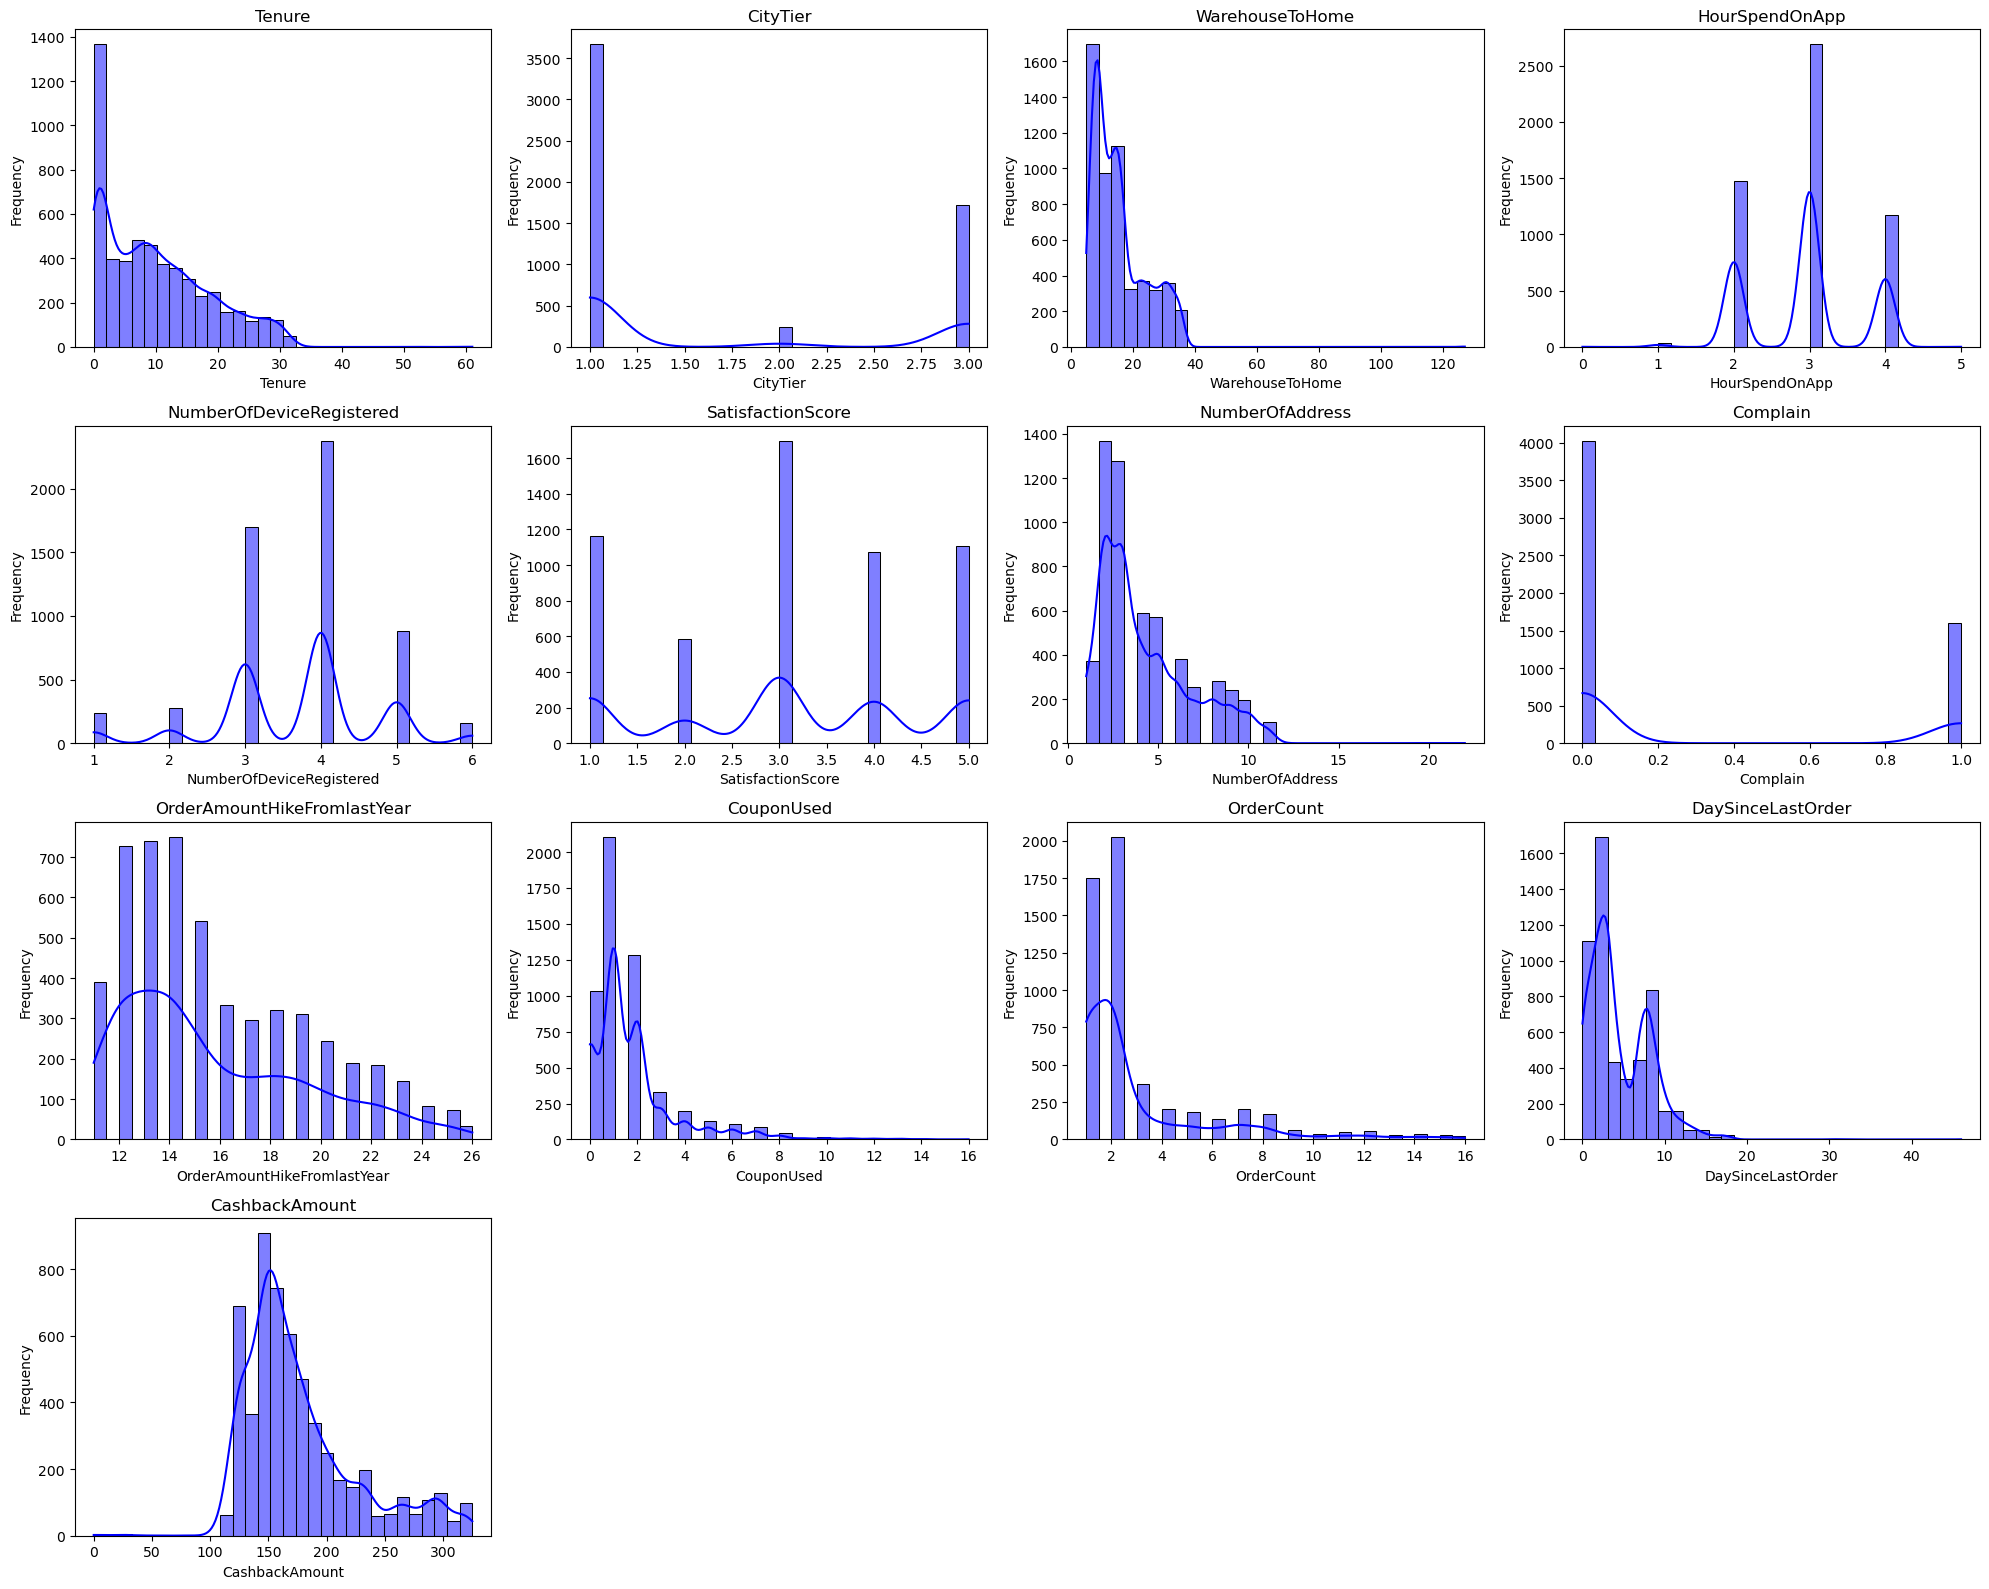

In [13]:

n = len(num_cols)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(churn_df[col], kde=True, ax=axes[i], color='blue', bins=30)

    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<hr/>

## Visualizing distribution across categorical columns

C:\Users\NewAdminUser\AppData\Local\Temp\ipykernel_6648\2417866216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\NewAdminUser\AppData\Local\Temp\ipykernel_6648\2417866216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\NewAdminUser\AppData\Local\Temp\ipykernel_6648\2417866216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\NewAdminUser\AppData\Local\Temp\ipykernel_6648\2417866216.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.

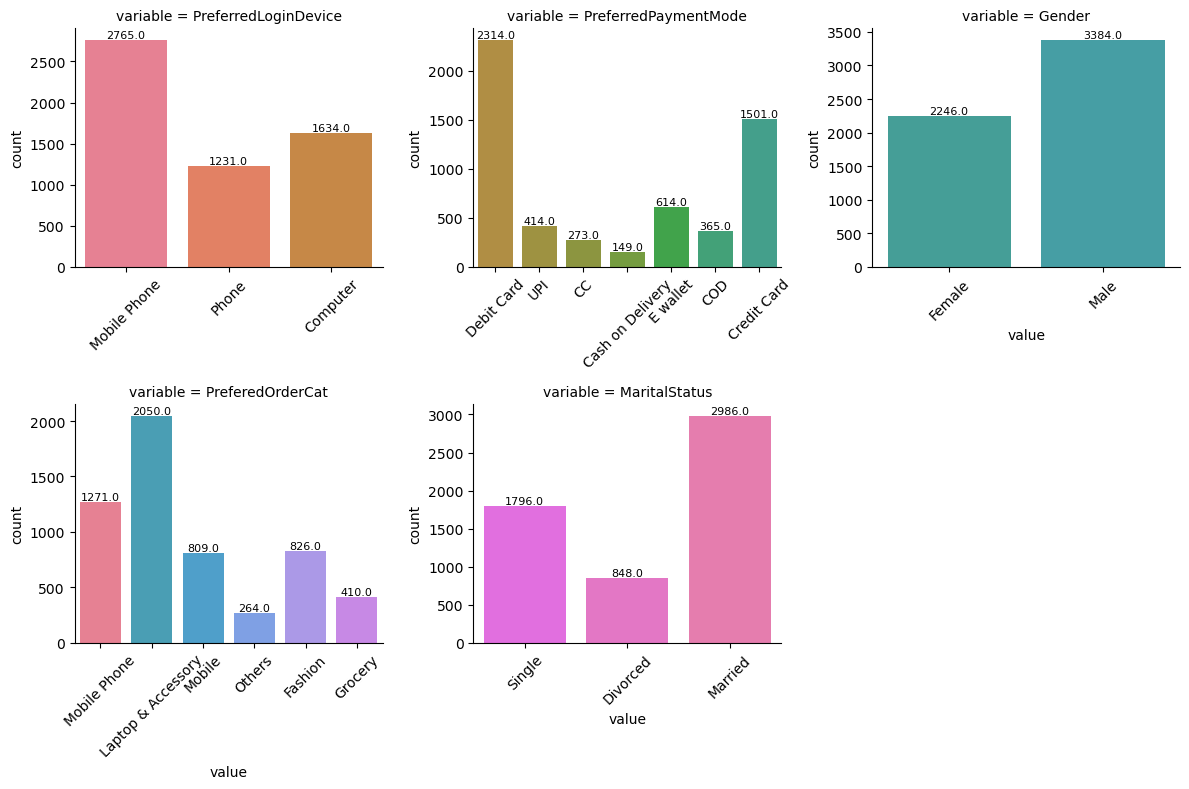

In [14]:


# Melt categorical columns into long format
melted_df = pd.melt(churn_df[cat_cols])

# Plot using seaborn's FacetGrid
g = sns.FacetGrid(melted_df, col="variable", col_wrap=3, sharex=False, sharey=False, height=4, hue="value")
g.map_dataframe(sns.countplot, x="value", order=None)

# Add data labels
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



### Observations from above plot

+ Most users prefer to use mobile phones to interact with our store
+ Debit and credit cards dominate as payment methods
+ More males than females, could mean products better geared towards men or a need to diversify
+ `Others` as an order category is vague and may hide useful information
+ Spelling issue (prefered should be preferred)

+ We can see that gadgets dominate our sales

<hr/>

#### Now, we want to get a good picture of how our target (churn) and features relate. It would be much clearer if we can visualize this

__It will help us understand:__
+ Which features are driving churn
+ Features that may not be needed for this project (weak correlation)
+ How we can come up with even better features

__Let's loop through our numerical columns to see how they relate to our churn__

#### Box Plots
__We want to pay attention to plots that have very different distributions in relation to churn. These can make for good predictors__

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Create subplot grid
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"{col} by Churn" for col in num_cols])

for idx, col in enumerate(num_cols):
    row = idx // n_cols + 1
    col_num = idx % n_cols + 1
    
    for churn_class in churn_df['Churn'].unique():
        fig.add_trace(
            go.Box(
                y=churn_df[churn_df['Churn'] == churn_class][col],
                name=str(churn_class),
                boxmean=True,
                showlegend=(idx == 0),  # only show legend on first subplot
            ),
            row=row, col=col_num
        )

# Update layout
fig.update_layout(
    height=300 * n_rows,
    width=400 * n_cols,
    title_text="Box Plots of Numeric Features by Churn",
    showlegend=True
)

fig.show()


### Observations from above plot

##### Numerical Features we can take into consideration based on variation of boxplot distribution:
+ Complaints
+ Satisfaction Score
+ Tenure
+ Cashback Amount

__It's important to work mainly with features that show high predictive power with our target(churn). features like `NumberOfDeviceRegistered` and `NumberOfAddress`, don't show considerable variation between churned and non-churned customers, meaning they may not have strong correlation with churn.__


- **Outliers:** There are visible outliers in features such as `CashbackAmount` and `OrderAmountHikeFromlastYear`, which could impact model performance if not handled properly.

<hr/>

### Now we want to know which of our categorical columns strongly correlate to churn

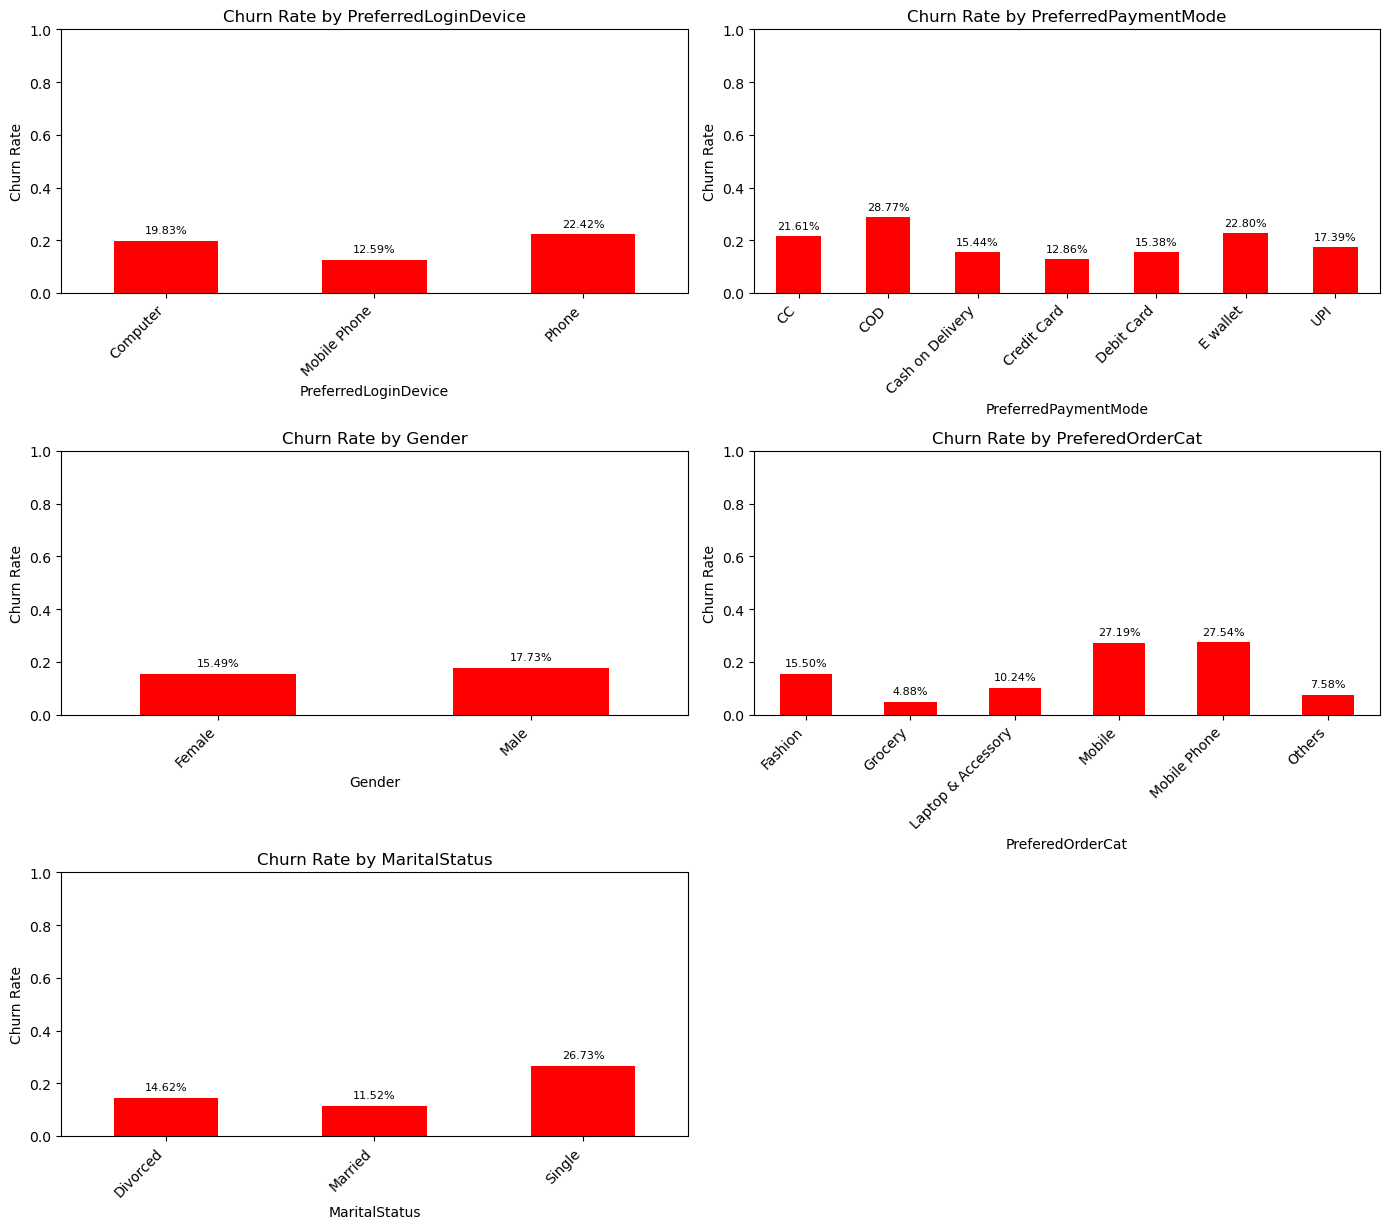

In [16]:

import math

n_cols = 2
# n_rows = -(-len(cat_cols) // n_cols)
n_rows = math.ceil(len(cat_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    
    # Group and normalize to get churn rate
    grouped = churn_df.groupby([col, "Churn"]).size().unstack(fill_value=0)
    churn_rate = grouped.div(grouped.sum(axis=1), axis=0)  
    
    # we only want it to show churn so we set to 1
    churn_rate[[1]].plot(kind='bar', color='Red', ax=ax, legend=False)
    
    ax.set_title(f'Churn Rate by {col}')
    ax.set_ylabel('Churn Rate')
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Show % text on bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 0.02, f'{height:.2%}', 
                ha='center', va='bottom', fontsize=8)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Observations from the above plot
+ No clear distinction between what 'Mobile Phone' and 'Phone' means, It's good to note this for when we begin properly cleaning our data
+ Users who order Mobile devices like phone have a noticeably higher churn rate than other order categories
+ Users who pay with Cash on Delivery (COD) and Credit Card (CC) have high churn rate 
+ 'Credit Card' and 'CC' likely mean the same thing, as well as 'COD' and 'Cash on Delivery' it will be revisited when we get to cleaning


<hr/>

### Correlation Matrix Heatmap to show correlation between features

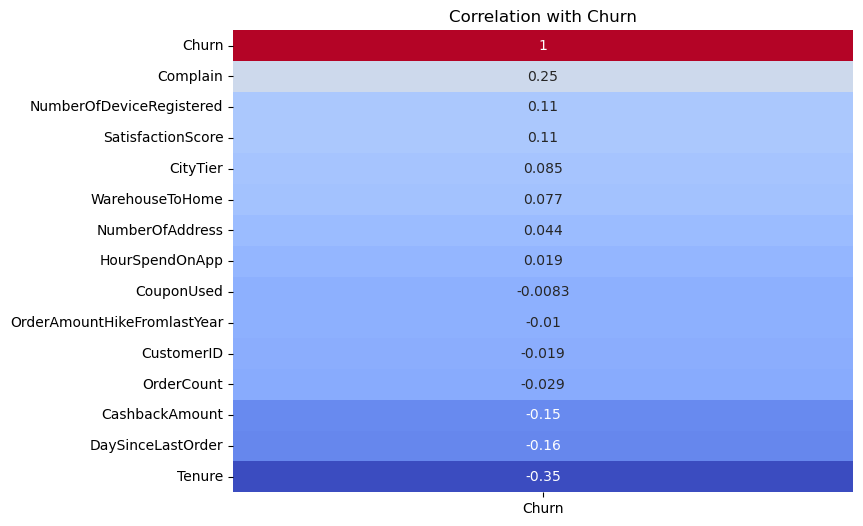

In [19]:
churn_corr = churn_df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)


plt.figure(figsize=(8, 6))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation with Churn')
plt.show()


<hr/>

## <b style = "text-decoration: underline;"> Summary: Key Takeaways From Exploratory Analysis</b> 

<p>A summary of points noticed from our data exploration would help to guide our data cleaning because we already know come major points to target</p>

+ Naming Conventions: some column categories would need to be renamed for better clarity and analysis. For example, 'Mobile Phone' and 'Phone' under the `PreferedLoginDevice` column can be merged into one.  `PreferedPaymentMode` values like 'CC' and 'Credit Card', 'COD' and 'Cash on Delivery' likely mean the same thing but named differently, they can be joined together when cleaniing the data.

+ Columns can be renamed to a more reader-friendly, consistent manner.

+ The category "Others" in column `PreferedOrderCat` is vague and may need clarification or re-categorization.

+ Most users prefer to use mobile phones to interact with our store

+ Debit and credit cards dominate as payment methods

**Relevant Columns**: Some columns show reasonable correlation to churn, these are columns that we may need to focus on more when carryiong out model training. 
##### Numerical columns such as:
- Complaints, SatisfactionScore, Tenure, CashbackAmount
##### Categorical columns like:
- PreferedLoginDevice, PreferedPaymentMode, PreferedOrderCat, MaritalStatus, Gender.
